<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Flask on AWS

---

<a id="learning-objectives"></a>
### Learning Objectives
*After this lesson, you will be able to:*
- Launch an EC2 box with an Apache webserver and Flask app
- Create a front-end page with a form that accepts user input
- Send POST requests from the front-end to the back-end flask app
- Return processed data to a front-end

### Lesson Guide

- [Introduction](#introduction)


- Demo/Guided Practice: Launching an EC2 Box
 - [Step 1 - Log in to EC2](#step--log-in-to-ec)
 - [Step 2 - Launch EC2 Instance](#step----launch-ec-instance)
 - [Step 3 - Select an AMI](#step----select-an-ami)
 - [Step 4 - Select EC2 Instance Type](#step----select-ec-instance-type)
 - [Step 5 - Configure Security Group](#step----configure-security-group)
 - [Step 6 - Connect to your EC2 Instance](#step----connect-to-your-ec-instance)
 - [Step 7 - Install Apache](#step----install-apache)
 - [Step 8 - Set up 'Hello World!' page](#step----set-up-hello-world-page)
 - [Step 9 - Run a Flask App](#step----run-a-flask-app)
 - [Step 10 - Set up a webform](#step----set-up-a-webform)
 - [Step 11 - Return Values to the Flask Backend](#step----return-values-to-the-flask-backend)
 - [Step 12 - Test it!](#step----test-it)


- [Independent Practice](#independent-practice)
- [Conclusion](#conclusion)
- [Additional Resources](#additional-resources)


<a id="introduction"></a>
## Introduction
---

In this lesson, we'll build an end-to-end solution to take data input via a web page, process it, and return the output via a webpage. We'll do all of this on a public-facing EC2 instance.

By making a website, you can retrieve the latest data from your database and create interactive visuals on-the-fly. Websites are typically much easier for clients and employers to use than Jupyter Notebooks.

Hopefully, you'll use this as inspiration for showcasing your projects!

Here, we'll set up a new EC2 instance that will host our website. We will initialize it using an existing AMI (Amazon Machine Image) that contains Anaconda and a number of other tools. Otherwise, we would start with just an operating system and would have to install tools manually.

<a id="step--log-in-to-ec"></a>
### Step 1 - Log in to EC2

Log into AWS and select EC2.

<img src="images/ec2-1.png">

<a id="step----launch-ec-instance"></a>
### Step 2 - Launch EC2 Instance

In the EC2 dashboard, click `Launch Instance`.

<img src="images/ec2-2.png">

<a id="step----select-an-ami"></a>
### Step 3 - Select an AMI

- In the pane `Community AMIs` search for anaconda2

- Select **anaconda3-5.1.0-on-ubuntu-16.04-lts (ami-a27c98c5)** and continue on with the defaults.

![Screen%20Shot%202018-09-04%20at%2021.07.31.png](images/Screen_Shot_2018-09-04_at_21_07_31.png)

<a id="step----select-ec-instance-type"></a>
### Step 4 - Select EC2 Instance Type

Choose the pre-selected t2-micro box. Then click - at the top `Step 6: Configure Security Group`
    
<img src="images/ec2-4.png">

<a id="step----configure-security-group"></a>
### Step 5 - Configure Security Group

Make sure that in security groups for the box that port 80 (HTTP) and 22 (SSH) are open and reachable from anywhere. Then at the bottom, click `Review and Launch`.

<img src="images/ec2-5.png">

<a id="step----connect-to-your-ec-instance"></a>
### Step 6 - Connect to your EC2 Instance

Return to the EC2 instances screen. You will see the box `pending` as it starts up. Once that is complete, tick the box next to the instance and click `Connect`.

<img src="images/ec2-6.png">

You should see something similar to the following. It will contain your IP address (it refers to a particular computer on the Internet) and the SSH (Secure SHell) string need to connect with your PEM file. Make sure you have the full path to the file or are in the directory where that PEM file is when connecting (usually ~/Downloads/<myfile.pem>). You will also need to change the login from "root@" to "ubuntu@".

<img src="images/ec2-6b.png">

Once you're on the box, you can run `ls` and see the following:

<img src="images/ec2-6c.png">

Now we need to install a couple of python libraries and dependencies:

```
sudo apt-get update 
sudo apt-get install alien
sudo apt install python-pip
sudo pip install -U pip numpy flask sklearn
```
Note: if you get a lock on the `dpkp` folder do:
```
ps -A | grep apt
```
and kill the processes.

<a id="step----install-apache"></a>
### Step 7 - Install Apache

Install Apache webserver. Back at the terminal, run the following commnads:

```
sudo apt-get update
sudo apt-get install apache2
sudo apt-get install libapache2-mod-wsgi-py3
```

That will install a number of updates and libraries. Once that is complete, we're ready to test our first web page.

Go to the EC2's public web address and put that in your browser. The address is on the page where you go to find the ssh info ('Connect').

You should see the following: 

<img src="images/ec2-7.png">

<a id="step----set-up-hello-world-page"></a>
### Step 8 - Set up 'Hello World!' page

At the command line, type in the following to create a webpage:

```
cd /var/www/html
sudo mkdir myapp
cd myapp
sudo touch index.html
sudo chmod 755 index.html
sudo vim index.html
```

What did we do there? We moved into the Apache directory that holds the files that are served as webpages. We then made a new directory there called `myapp`. We then changed into that directory and created a page called `index.html`. Finally, we set the permissions on the file and opened it in our text editor.

Now that you are in vim, you should hit `'i'` for insert, and then type in something like the following: `"Hello from DSI!"`. Once you have that done, hit `'ESC'` and then `':wq'`. This means write the file and then quit vim.

Once that is done, we can view our webpage. Go the the address you did earlier for the box in your browser, but this time add `'/myapp'` or `'/myapp/index.html'` to the end.

If everything went according to plan, you will see the following:

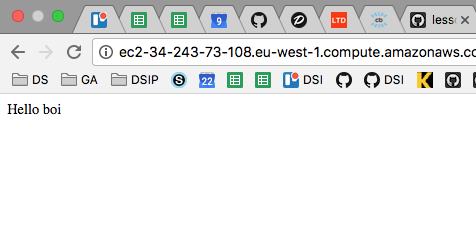

Congrats! You have the most boring page on the web! Let's now make it better by adding a flask app back-end.

<a id="step----run-a-flask-app"></a>
### Step 9 - Run a Flask App

Now let's do the following to get Flask running:

```
cd /var/www/html/myapp
sudo touch myapp.py
sudo chmod 755 myapp.py
sudo vim myapp.py
```

Once you are in vim, paste the following code in myapp.py

```python
from flask import Flask
app = Flask(__name__)

@app.route('/')
def hello_world():
  return 'Hello from Flask!'

if __name__ == '__main__':
  app.run()
```

Use the usual routine in vim to save and exit (ESC then ':wq')

Next, we need to create a wsgi file which will tell Apache to serve from our Flask app.

```
sudo touch myapp.wsgi
sudo chmod 755 myapp.wsgi
sudo vim myapp.wsgi
```


Paste the following into the file:
    
```python
import sys
sys.path.insert(0, '/var/www/html/myapp')
sys.path.insert(0, '/home/ubuntu/anaconda3/bin/python3.6')
sys.path.insert(0, '/home/ubuntu/anaconda3/lib/python3.6/site-packages')

from myapp import app as application
```

Once that is done, save and exit.

This code makes sure that the version of python our code is using is the Anaconda one.

We have to enable mod_wsgi now to complete the connection between Flask and Apache. This ensures that pages are from Flask and not the default static web pages (like the one you created earlier). We can do this as follows:

```bash
sudo vim /etc/apache2/sites-enabled/000-default.conf
```

Once that is open, insert the following code. It should go after the 'DocumentRoot /var/www/html' line.

```bash
    WSGIDaemonProcess myapp threads=5
    WSGIScriptAlias /myapp /var/www/html/myapp/myapp.wsgi

    <Directory myapp>
        WSGIProcessGroup myapp
        WSGIApplicationGroup %{GLOBAL}
        Order deny,allow
        Allow from all
    </Directory>
```

Save and exit. Then type the following to restart apache:

```bash
sudo service apache2 restart
```

Now when you go to your webpage '/myapp' in your browser you should see:
<img src="images/browser-2.png">

<a id="step----set-up-a-webform"></a>
### Step 10 - Set up a webform

Now that we have the basic Flask app deployed, let's now set up a page with a form that can accept user input.

We'll first create the page. This should be in your /myapp directory.

```bash
sudo touch input_page.html
sudo chmod 755 input_page.html
sudo vim input_page.html
```

Now, let's add a form
```HTML
<html>
<form action="make_it_happen" method="post">
  First name: <input type="text" name="myname"><br><br>
  Excitement Level (1: low, 10: high): <input type="text" name="mylevel"><br>
  <input type="submit" value="Submit">
</form>

</html>
```
Now save that and exit vim (:wq).

That created our input page. We now need to modify Flask to accept the input from this page. We'll open the myapp.py file using:

```python
import jinja2
from flask import Flask, render_template, request
app = Flask(__name__)
app._static_folder = '/var/www/html/myapp/'


@app.route('/')
def send_form():
    return app.send_static_file('input_page.html')


@app.route('/make_it_happen', methods=['POST','GET'])
def say_hi():
    name = request.form['myname']
    excitement_level = request.form['mylevel']
    return render_template('stuff_you_know.html', name=name, lvl=excitement_level)


if __name__ == '__main__':
    app.run(debug=True)

```

Again, save and exit (':wq'). Once that is done, you'll need to restart apache again:
```bash
sudo service apache2 restart
```

If everything went well, you should see this in your browser:

<img src="images/browser-3.png"> 

If you got an error, most likely it is because you pasted it in before pressing `i` to insert and your `import` is `mport`

We'll walk through what each piece of this does. The first piece of code under the imports sets our app as Flask and points it to where we will be serving our static HTML pages. This is the directory of our '/myapp'.

Next we have a function that runs when the default route for our app is called ('/'). We are returning the page we just created.

The next function is called when the form is submitted and takes the payload of that form: the entered name and the level of excitement level. It then sends it to what is called a string template. A string template allows us to pass in values from our code that can then be manipulated outside of our code in the HTML. This allows for a separation of concerns. The view can be dynamically generated based on the values passed to it, rather than having to code all the conditionals in Python on the Flask backend.

We capture the values passed to us in the form. Notice that the names in the HTML are captured and stored into Python variables.

Next, we discuss how to return an output with those values.

<a id="step----return-values-to-the-flask-backend"></a>
### Step 11 - Return Values to the Flask Backend

The return of that last function is returning a page that utilizes a Jinja2 string template. We are passing our Python variables, 'name' and 'excitement_level' to our string template under the Jinga2 variable names 'name' and 'lvl'. We could have used any variable names for these. We can also use as many as we want. Note, that they don't have to just be an integer. The can be a string or a list of values or basically any other type.

The next step is to create the folder that will hold our output pages.

In the /myapp directory:

```python
sudo mkdir templates
sudo chmod 755 templates
cd templates
sudo touch stuff_you_know.html
sudo chmod 755 stuff_you_know.html
sudo vim stuff_you_know.html
```

That will create the directory `/templates` and some files. 

You should now be int the stuff_you_know.html file. Paste in the following:
```HTML
<!DOCTYPE html>
<html>

<head>
</head>

<body>
  <center>
    {{ name }} your excitement level is {{ lvl }} {% if lvl|int
    <=5 %} is a failure. Shame.<br><br>
      <img src="https://blackxknite.files.wordpress.com/2017/03/lameasaurus.jpg"> {% elif lvl|int > 5 and lvl|int
      < 10 %} is meh. Try harder.<br><br>
        <img src="https://www.yourtango.com/sites/default/files/styles/body_image_default/public/image_list/motivational17.jpg?itok=RXI57Muf"> {% else %} is fantastic. You are a star.<br><br>
        <img src="https://media.makeameme.org/created/fully-motivated-ny0ix4.jpg"> {% endif %}
  </center>
</body>

</html>
```

Lots of code there. What's going on?

Our variables that we passed in using Flask were 'name' and 'lvl' if you remember. Notice that we are using those here. They are in the curly braces: `{{ name }}` and `{{ lvl }}`. These are called templates, since Jinja2 will replace these placeholders with the variable values upon rendering. Just putting the curly braced values prints out to our page the values we passed in.

Here we also employed some conditional logic. This is how string templating works. We can do a number of operations using Jinja2; we can do everything from formatting values to showing or hiding data based on its values. It is very flexible and prevents us from having to change our backend code for every scenario.

<a id="step----test-it"></a>
### Step 12 - Test it!

Now that we have all the pieces, go ahead and go to the page for our app in your browser.

`/myapp`

Fill in the form. Try different values like 2, 7, 10.

Notice how the output changes with those values.

What are some ways you could use this in your work?

**Important Note:** So far, we have been modifying files directly on the EC2 instance. This is _not_ how web development is typically done. That said, going through this process is useful for understanding, debugging, ... and perhaps for making quick "hotfixes". Keep in mind that directly editing files on production systems is highly prone to human error, so it should be avoided.

Typically, you should develop your Flask app locally. Test it using the local server. Then, once it works locally you can copy the files directly to EC2. 

To make this process easier, many companies automatically deploy code to EC2 each time it is committed to Github by mirroring the repo there. Alternatively, you could write a bash script that automatically copies your files to an EC2 instance. For example, Heroku offers a script to do this automatically. 

<a id="independent-practice"></a>
## Independent Practice
---

Modify the code so that it accepts another input.
You'll need to do all of the following to make it work:
- Change the input form page to add another field
- Change the myapp.py Flask code to accept the new field
- Change the Jinja template file to react to this new variable
<br><br>
**Bonus**
- Try setting it up so that your webpage uses ajax (asynchronous Javascript). Ajax is a method that makes HTTP calls to your Flask app in the background, so that loading a new page isn't necessary. You'll need to learn about jQuery to use this. See the [Additional Resources](#additional-resources) below.

<a id="conclusion"></a>
## Conclusion
---

In this lesson we have learned how to launch an AWS EC2 box from an existing AMI. We learned how to install an Apache webserver and to use mod_wsgi to run our flask application as a daemon. We also learned how to build a frontend that can take in values that are POST'd to the backend Flask application. We saw how those values can be processed (or not) then passed into a string template engine.

Some additional things we could have done:

- Change the mimetype on our form to pass in a csv
- Manipulate the variables in Python/Flask before returning them
- Use a charting library to visualize what we pass to the templates
- Store and retrieve the values in a database

<a id="additional-resources"></a>
## Additional Resources
---

- [Apache Web Server Tutorial](https://www.digitalocean.com/community/tutorials/how-to-configure-the-apache-web-server-on-an-ubuntu-or-debian-vps)
- [Flask Docs](http://flask.pocoo.org/docs/0.11/)
- [Jinja2 Docs](http://jinja.pocoo.org/docs/dev/)
- [AJAX/jQuery](http://flask.pocoo.org/docs/0.11/patterns/jquery/)